In [1]:
%reload_ext autoreload
%autoreload

import os, sys
dir2 = os.path.abspath('/home/ofir/PycharmProjects/DFC/Domains')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)


In [2]:
from Domains.Taxis.multitaxienv.taxi_environment import TaxiEnv

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import matplotlib.pyplot as plt
from Domains.Taxis.multitaxienv.taxi_utils import rendering_functions
from Domains.Taxis.multitaxienv import config

In [4]:
def snapshot_environment(environment_instance: TaxiEnv) -> None:
    print("Grid world representation:")
    rendering_functions.render(environment_instance.desc.tolist(), environment_instance.state,
                              environment_instance.num_taxis, environment_instance.collided,
                              environment_instance.last_action, environment_instance.action_index_dictionary,
                              environment_instance.dones)
    print("Image world representation:")
    img = rendering_functions.map2rgb(environment_instance.state, environment_instance.desc.astype(str))
    plt.imshow(img)
    plt.show()

In [5]:
domain_instance = TaxiEnv(num_taxis=1)

Grid world representation:
+---------+
| : : : : |
| : : : : |
| : : :_: |
| : : : : |
| : : : : |
+---------+
Taxi1-YELLOW: Fuel: 0, Location: (2,3), Collided: False
Passenger1: Location: (3, 3), Destination: (4, 1)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
Image world representation:


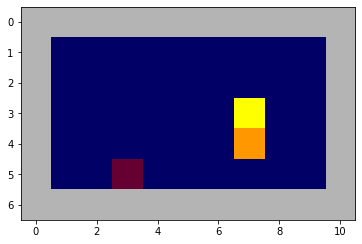

In [6]:
snapshot_environment(domain_instance)

In [7]:
def get_action_ditionary_from_list(action_index_dict: dict, agent_names: list, action_list: list) -> dict:
    action_dict = {}
    for i, name in enumerate(agent_names):
        action_dict[name] = action_index_dict[action_list[i]]
    
    return action_dict

In [8]:
print("Legal actions are:\n", list(domain_instance.action_index_dictionary.keys()))

Legal actions are:
 ['south', 'north', 'east', 'west', 'pickup', 'dropoff0']


In [9]:
dict_to_perform = get_action_ditionary_from_list(domain_instance.action_index_dictionary, 
                                                 domain_instance.taxis_names,
                                                 ['north'] * 5)

In [10]:
observations, rewards, dones, _ = domain_instance.step(dict_to_perform)

Grid world representation:
+---------+
| : : : : |
| : : :_: |
| : : : : |
| : : : : |
| : : : : |
+---------+
  (north)
Taxi1-YELLOW: Fuel: 0, Location: (1,3), Collided: False
Passenger1: Location: (3, 3), Destination: (4, 1)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
Image world representation:


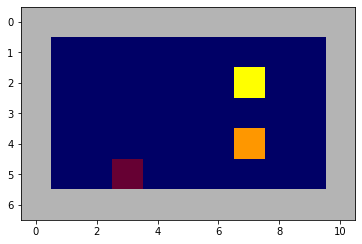

In [11]:
snapshot_environment(domain_instance)

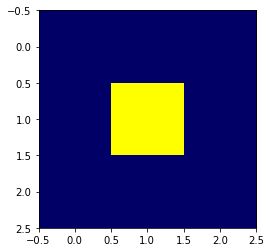

In [17]:
import numpy as np

plt.imshow(observations['taxi_1'][0].astype(np.uint8))
plt.show()

In [15]:
observations['taxi_1'][0].shape

(3, 3, 3)

In [13]:
def observation_snapshot(observations: dict) -> None:
    num_of_observations = len(list(observations.keys()))
    fig, axs = plt.subplots(1, num_of_observations)
    for i, name in enumerate(list(observations.keys())):
        axs[i].imshow(observations[name][0])
        axs[i].title.set_text(f'{name}')
    plt.show()
    
    for name in list(observations.keys()):
        print(name+': ', (observations[name][1]))


Grid world representation:
+---------+
| : : : : |
| : :_: : |
| : : : : |
| : : : : |
| : : : : |
+---------+
  (west)
Taxi1-YELLOW: Fuel: 0, Location: (1,2), Collided: False
Passenger1: Location: (3, 3), Destination: (4, 1)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2]
Image world representation:


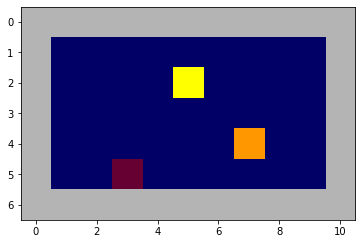

TypeError: 'AxesSubplot' object is not subscriptable

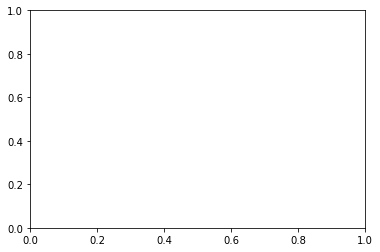

In [14]:
actions_to_perform = ['west']
dict_to_perform = get_action_ditionary_from_list(domain_instance.action_index_dictionary, 
                                                 domain_instance.taxis_names, actions_to_perform)

observations, rewards, dones, _ = domain_instance.step(dict_to_perform)
snapshot_environment(domain_instance)
observation_snapshot(observations)


In [ ]:
domain_instance.step({'taxi_1': 3})